In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from thomson import *
from lsst.sims.utils import _healbin
import healpy as hp
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as mb
import numpy.ma as ma

In [24]:
filename= '6000_minnoise0.90.npz'
load = np.load(filename)
fit_result = load['fit_result'][()].copy()
load.close()

In [25]:

x,y,z = x0_split(fit_result['x'])


<IPython.core.display.Javascript object>


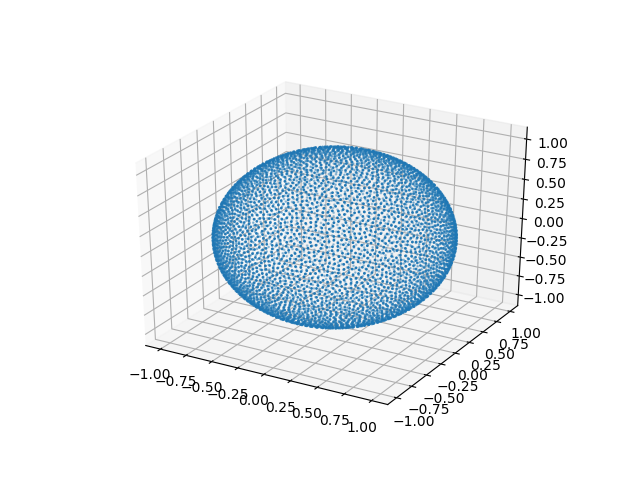

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=1)

<IPython.core.display.Javascript object>


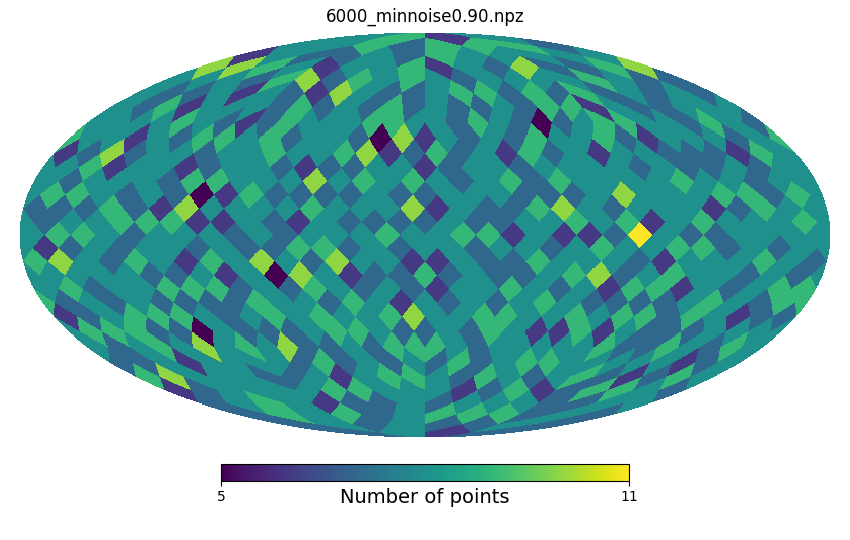

In [27]:
nside=8
theta, phi = xyz2thetaphi(x, y, z)
density = _healbin(theta, phi-np.pi/2, theta*0+1, nside=nside, reduceFunc=np.sum)
hp.mollview(density, unit='Number of points', title=filename)

In [28]:
# make a simple pointing history and see what the MAF map looks like
data = np.zeros(theta.size, dtype=list(zip(['RA', 'dec', 'mjd'],[float,float,float])))
data['RA'] = np.degrees(theta)
data['dec'] = np.degrees(phi-np.pi/2.)
data['mjd'] = 1

In [35]:
nside=256
metric = metrics.CountMetric('mjd')
slicer = slicers.HealpixSlicer(lonCol='RA', latCol='dec', nside=nside, badval=0)
sql=''
bundle = mb.MetricBundle(metric, slicer, sql)
bd = mb.makeBundlesDictFromList([bundle])

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [36]:
mbg = mb.MetricBundleGroup(bd, None)
mbg.setCurrent('')
mbg.runCurrent('', simData=data)

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Running:  ['opsim_Count_mjd_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


<IPython.core.display.Javascript object>


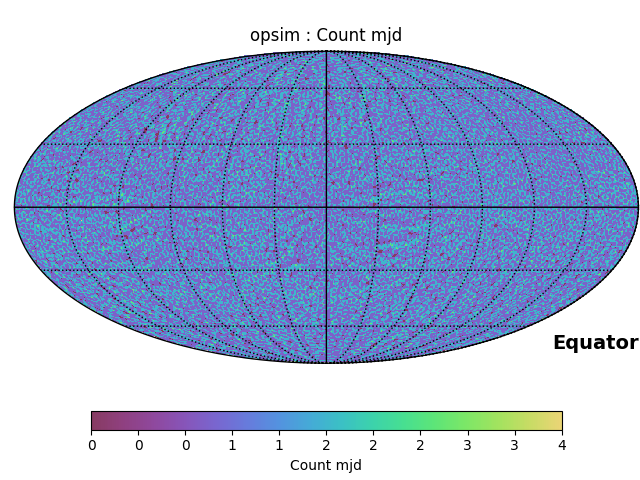

<IPython.core.display.Javascript object>


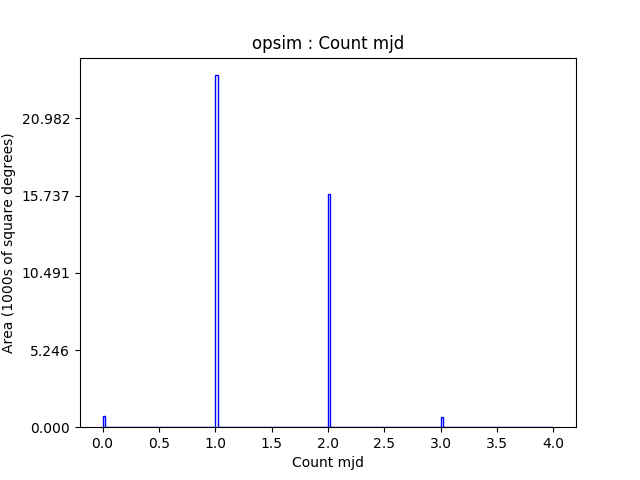

<IPython.core.display.Javascript object>


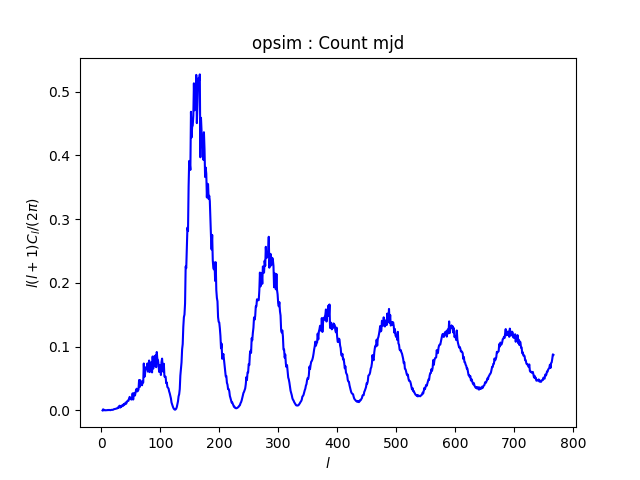

monopole: 1.39905  dipole: lon: -145.897, lat: 24.9315, amp: 0.00925905
Plotting complete.


In [37]:
# make sure missing pixels are not masked
#bundle.metricValues.data = bundle.metricValues.filled()
bundle.metricValues = ma.masked_array(bundle.metricValues.filled())
bundle.metricValues.mask = np.zeros(bundle.metricValues.size, dtype=bool)
mbg.plotAll(closefigs=False)

In [32]:
theta.size

6000

In [33]:
bundle.metricValues

masked_array(data = [2.0 2.0 1.0 ..., 1.0 1.0 1.0],
             mask = [False False False ..., False False False],
       fill_value = 1e+20)

In [34]:
bundle.metricValues.filled().min()

0.0